 Predict the happiness score considering all the other factors mentioned in the dataset. https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

# Import Data Set

In [2]:
#import data set
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

As per the problem statement we need to predict the happiness score which is based on 'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual' so we can drop rest of the columns like country, region and happiness rank

In [7]:
#droping the columns country, region and happiness rank 
df.drop(['Country', 'Region', 'Happiness Rank'],axis = 1, inplace=True)

In [8]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


so now all the columns conatain numerical data, there are in total 158 entries 

In [11]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


the mean happiness scrore = 5.37 and standard deviation is 1.14

# Null Value Analysis

In [14]:
df.isnull().sum() #to find the null data in the data set

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So there is no null data throughout the dataset, hence imputation not required

# Duplicate Data Analysis

In [15]:
df.drop_duplicates()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


as the outcome is similar as that of previous data ie 158 rows, hence no duplicate data present

# Visualization

# Univariate Visualization

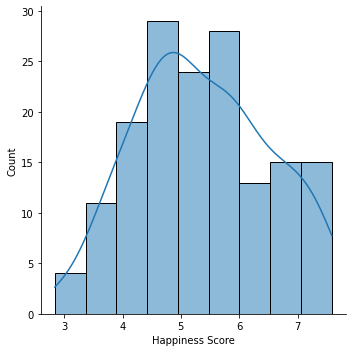

In [20]:
#lets try to visualize how happiness score 
#sns.scatterplot(x='Standard Error',y='Happiness Score', data = df)

Happiness_Score = sns.displot(data=df['Happiness Score'], kde=True)

# Multivariate Visualization

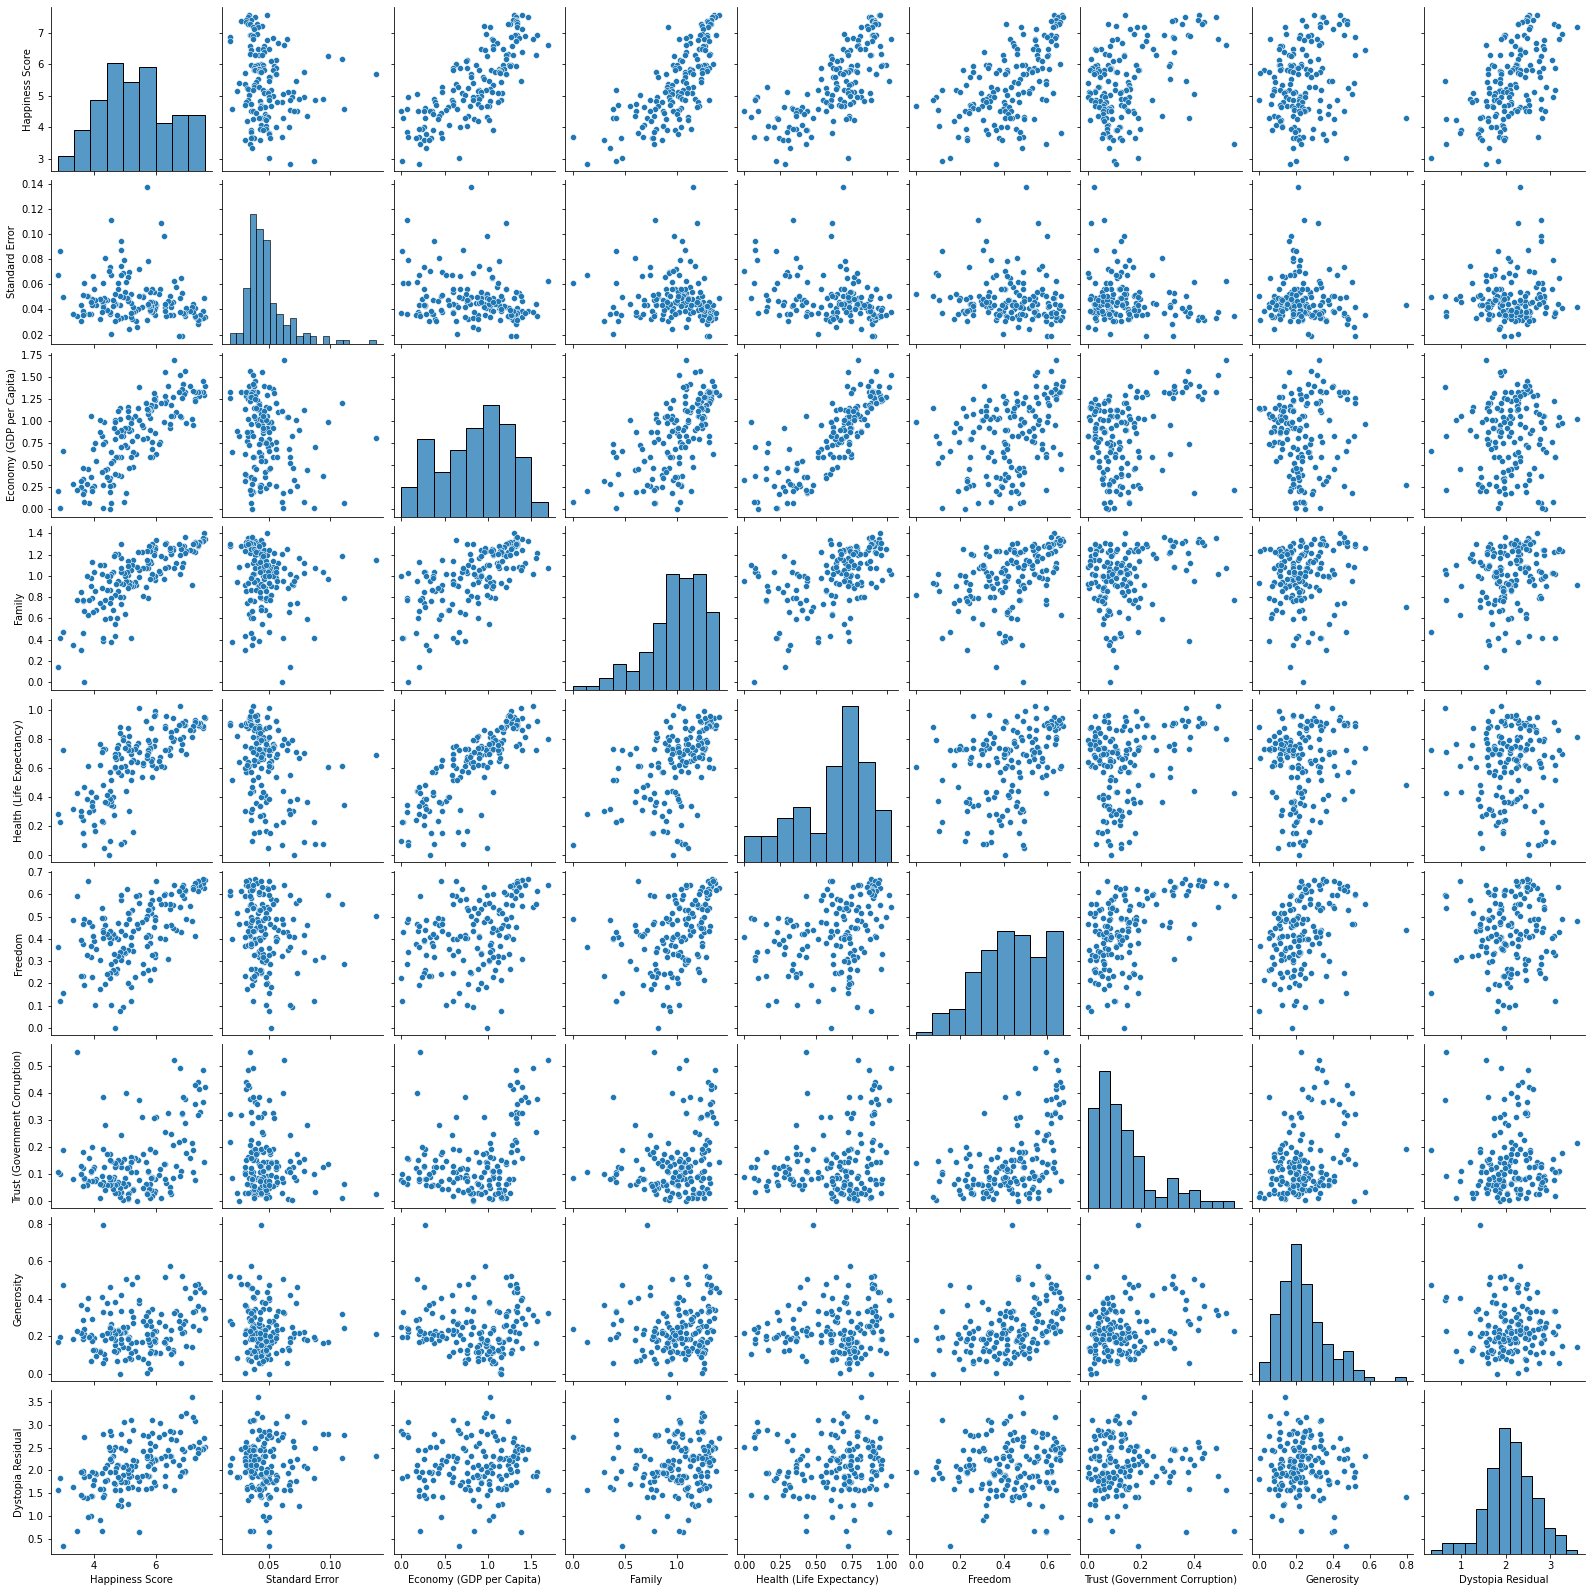

In [21]:
sns.pairplot(df)

# Correlation

In [23]:
#lets find out the corelation between data
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [26]:
df.corr()['Happiness Score'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

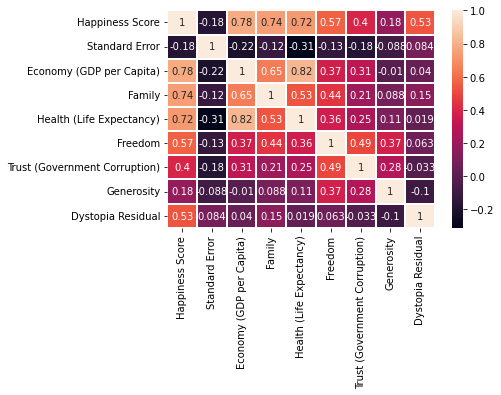

In [31]:
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='white')

Observation:
- Standard Error is -ve correlated to Happiness Score while other parameters are positively correlated
- Economy, Family, Health, Freedom and Dystopia Residual have 78%, 74%, 72%, 56%, 53% correlation which is a strong bond
- Trust has 39% correlation which is a good bond

# Skewness

In [33]:
import warnings #to ignore warnings
warnings.filterwarnings("ignore")

df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

all the parameters have high skewness
- Std Error, Trust, Generosity are skewed to the left
- Economy, family, health, freedom, dystopia residual are skewed to the right

# Normal Distribution Curve

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

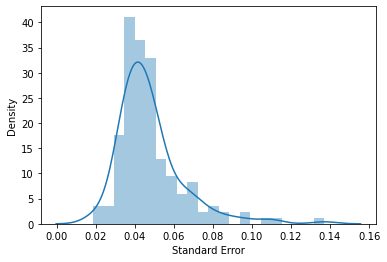

In [34]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

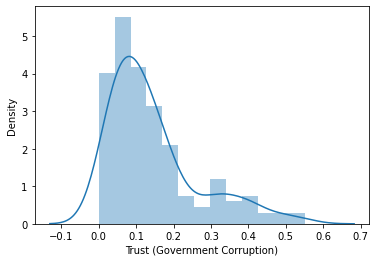

In [37]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

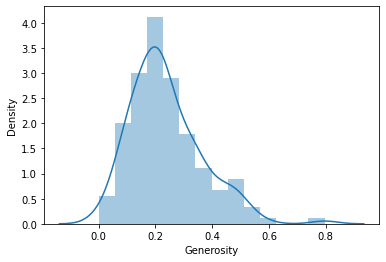

In [40]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

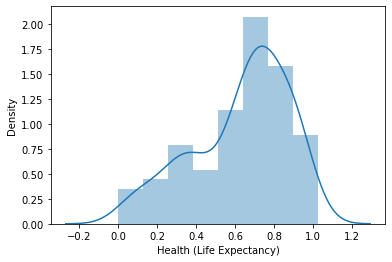

In [39]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

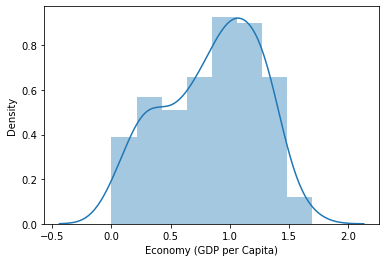

In [41]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

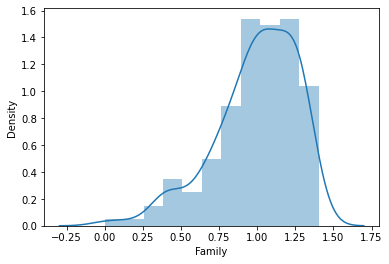

In [42]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

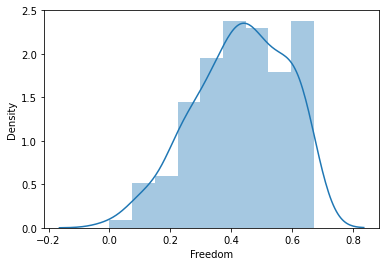

In [43]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

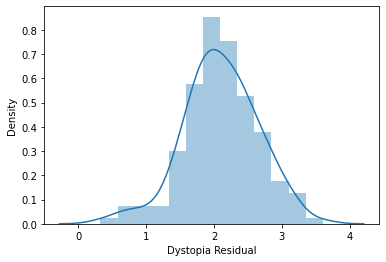

In [44]:
sns.distplot(df['Dystopia Residual'])

# Testing Outliers

<AxesSubplot:xlabel='Standard Error'>

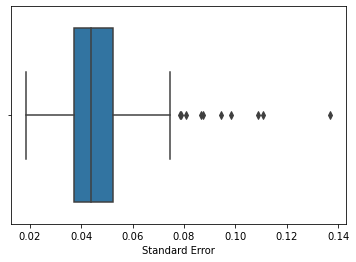

In [45]:
sns.boxplot(x=df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

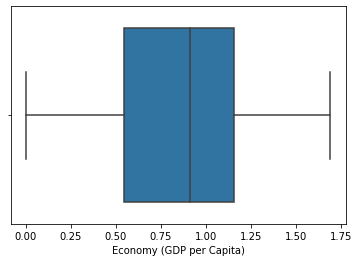

In [46]:
sns.boxplot(x=df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

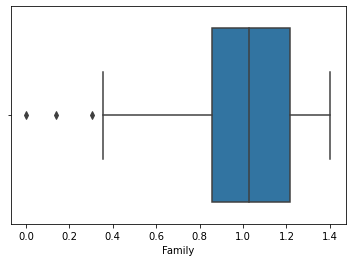

In [47]:
sns.boxplot(x=df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

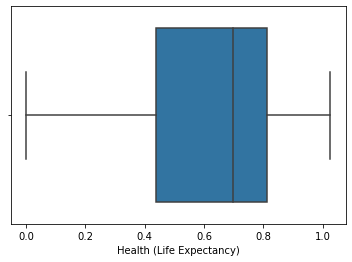

In [48]:
sns.boxplot(x=df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

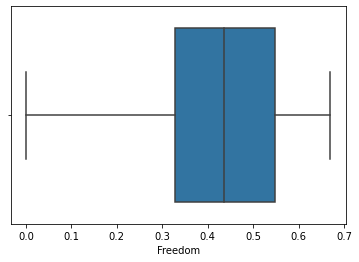

In [49]:
sns.boxplot(x=df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

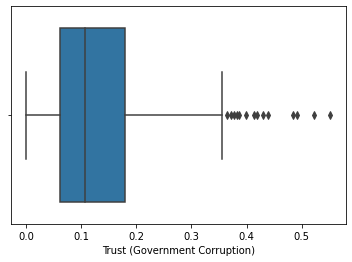

In [50]:
sns.boxplot(x=df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity'>

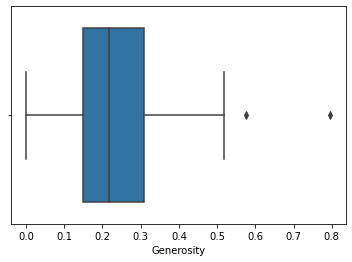

In [51]:
sns.boxplot(x=df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual'>

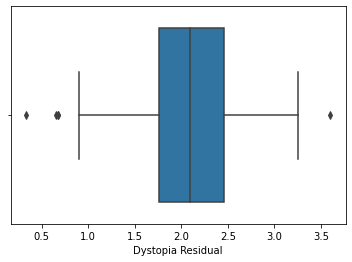

In [52]:
sns.boxplot(x=df['Dystopia Residual'])

Observation - Std error, family, trust, generosity, dystopia residual have outliers

# Removing Outliers

In [53]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library

zscore(df)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [54]:
z = np.abs(zscore(df))
z.shape

(158, 9)

In [55]:
np.where(z>3) #detecting outliers where z>3

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))

In [56]:
z.iloc[40] #checking one of the detected outliers

Happiness Score                  0.694129
Standard Error                   3.572774
Economy (GDP per Capita)         0.910039
Family                           0.708987
Health (Life Expectancy)         0.062646
Freedom                          0.866924
Trust (Government Corruption)    1.103367
Generosity                       0.642559
Dystopia Residual                0.307801
Name: 40, dtype: float64

in this case outlier is in Std error

In [57]:
#checking total number of rows where z>3

len(np.where(z>3)[0])

9

length is 9 that means 9 rows out of 158 need to be eliminated from dataframe to normalize it

In [59]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (158, 9)
New Data Frame: (149, 9)
Total Dropped Rows: 9


In [60]:
#percent loss
percent_loss = 9*100/158
print("Percent Loss: ",percent_loss)

Percent Loss:  5.69620253164557


so there is 5% data loss, which is acceptable

# Data Separation

In [61]:
#independent variable
x = df_new.iloc[:,1:]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [62]:
#dependent variable
y = df_new.iloc[:,0]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

# Training Model using Linear Regression

In [76]:
#importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [77]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    print(f"At random state {i}, the training accuracy is {r2_score(y_train, pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test, pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.9999999401862153
At random state 0, the testing accuracy is 0.9999999219631722


At random state 1, the training accuracy is 0.9999999439671279
At random state 1, the testing accuracy is 0.9999998920156155


At random state 2, the training accuracy is 0.9999999375909614
At random state 2, the testing accuracy is 0.9999999359949147


At random state 3, the training accuracy is 0.9999999407263306
At random state 3, the testing accuracy is 0.9999999158525467


At random state 4, the training accuracy is 0.9999999325590068
At random state 4, the testing accuracy is 0.9999999343611596


At random state 5, the training accuracy is 0.9999999387005022
At random state 5, the testing accuracy is 0.9999999266221805


At random state 6, the training accuracy is 0.9999999411254202
At random state 6, the testing accuracy is 0.9999999113410362


At random state 7, the training accuracy is 0.9999999484422943
At random state 7, the testing accuracy is 0.999

At random state 90, the training accuracy is 0.9999999430920831
At random state 90, the testing accuracy is 0.9999999018000844


At random state 91, the training accuracy is 0.9999999433112218
At random state 91, the testing accuracy is 0.9999998996384727


At random state 92, the training accuracy is 0.9999999359971843
At random state 92, the testing accuracy is 0.9999999400693742


At random state 93, the training accuracy is 0.99999993790586
At random state 93, the testing accuracy is 0.9999999337750943


At random state 94, the training accuracy is 0.9999999396945767
At random state 94, the testing accuracy is 0.9999999201497718


At random state 95, the training accuracy is 0.9999999399490214
At random state 95, the testing accuracy is 0.9999999244998629


At random state 96, the training accuracy is 0.9999999391791681
At random state 96, the testing accuracy is 0.9999999187978826


At random state 97, the training accuracy is 0.999999935276436
At random state 97, the testing accu

In [78]:
#lets pick a random state, as almost all are giving a good accuracy

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 91)

In [79]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

In [82]:
r2_score(y_train, pred_train)

0.9999999433112218

In [83]:
r2_score(y_test, pred_test)

0.9999998996384727

# Cross-validation of the model

In [85]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9999997233324835 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 3 the cv score is 0.9999994627506625 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 4 the cv score is 0.9999986870461732 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 5 the cv score is 0.9999981234686345 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 6 the cv score is 0.9999971764821884 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 7 the cv score is 0.9999952492730105 and accuracy score for training is 0.9999999433112218 and accuracy for testing is 0.9999998996384727


At cross fold 8 the cv score is 0.9999950274739778 and accuracy score for tr

since the number of folds don't have much impact on accuracy so cv = 9 selected

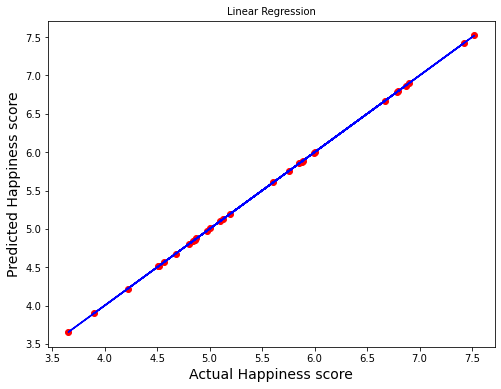

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness score', fontsize = 14)
plt.ylabel('Predicted Happiness score', fontsize = 14)
plt.title('Linear Regression',fontsize=10)
plt.show()

We are getting model accuracy and cross validation both as 99.99% which shows model is performing extremely well

# saving the final model

In [91]:
import pickle
filename = 'happiness_score.pkl'
pickle.dump(lr,open(filename,'wb'))

# conclusion

In [93]:
loaded_model = pickle.load(open('happiness_score.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.99998996384727


In [95]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Original'])

In [96]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Predicted,5.604677,4.87432,4.799709,4.857706,5.007114,5.888982,5.878317,6.786209,5.097671,4.839302,...,6.002689,4.512236,6.669684,5.124248,5.855216,6.797756,7.426856,4.517864,3.896596,4.971092
Original,5.604677,4.87432,4.799709,4.857706,5.007114,5.888982,5.878317,6.786209,5.097671,4.839302,...,6.002689,4.512236,6.669684,5.124248,5.855216,6.797756,7.426856,4.517864,3.896596,4.971092
